<a href="https://colab.research.google.com/github/Ahmdridwan28/Citra-_Digital_2/blob/main/Citra_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Resolusi gambar: 266x190 piksel


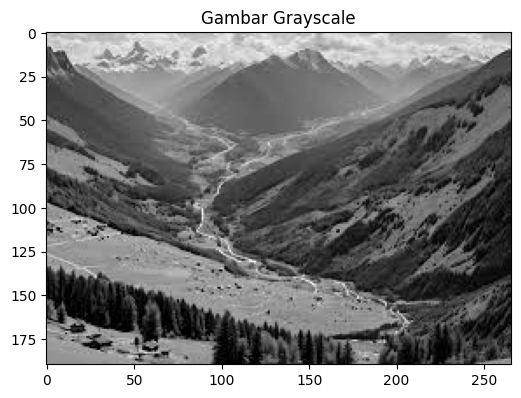

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("/content/drive/MyDrive/Foto/Gambar 5.jpeg", cv2.IMREAD_GRAYSCALE)
#Get the shape of the image. Should return 2 values for grayscale images
height, width = image.shape
print(f'Resolusi gambar: {width}x{height} piksel')

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Gambar Grayscale") #Fixed typo in title
plt.show()

In [ ]:
print("display the image matrix contains", len(image[:2]),"pixels")
print(image[:2])

display the image matrix contains 2 pixels
[[253 255 255 255 253 251 252 254 248 249 255 255 250 251 255 255 255 255
  251 251 245 255 252 255 254 254 252 252 253 255 255 255 235 255 251 255
  255 255 250 254 254 240 246 241 255 255 217 186  63  34  29  51  70 140
  226 232 225 164 142 210 190 149 211 235 207 113 119 207 239 235 234 221
  230 232 236 236 224 158 137 193 223 227 232 231 227 225 230 236 216 244
  226 226 222 228 222 234 229 236 226 180 196 232 245 225 228 227 227 228
  228 227 227 228 225 226 230 232 215 231 226 225 226 226 226 226 226 226
  226 226 226 226 226 226 226 226 226 226 236 211 234 157 217 222 144 198
  236 226 225 234 236 227 222 225 220 242 232 183 168 215 244 223 223 233
  222 225 231 232 181  43 129 255 255 236 255 255 249 255 255 255 255 255
  255 255 255 255 251 250 253 255 255 255 250 245 248 245 251 255 255 250
  251 255 255 255 255 255 255 255 255 255 254 254 254]
 [247 249 253 255 255 255 250 245 255 254 254 252 254 255 252 215 245 236
  252 255 252 

In [4]:
pixel_data = np.array(image)
np.savetxt("gojo_satoru.txt", pixel_data,fmt="%d")

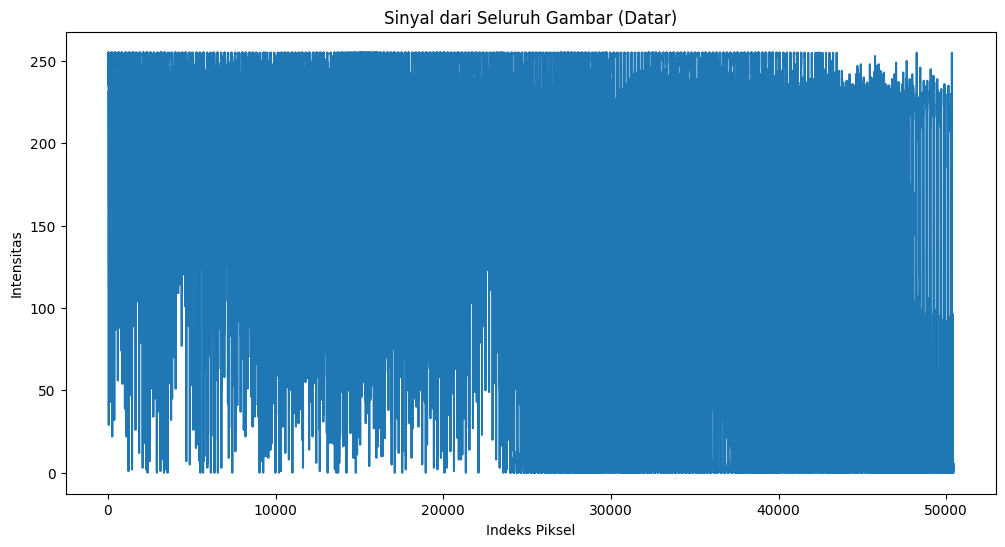

In [ ]:
signal_2d = image.flatten()
plt.figure(figsize=(12, 6))
plt.plot(signal_2d)
plt.title("Sinyal dari Seluruh Gambar (Datar)")
plt.xlabel("Indeks Piksel")
plt.ylabel("Intensitas")
plt.show()

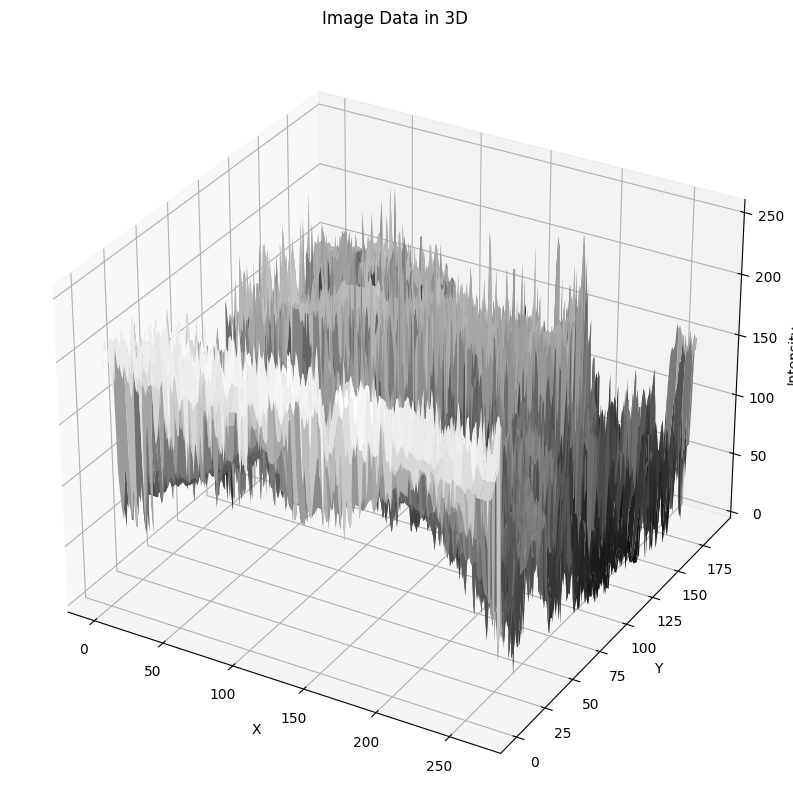

In [5]:
#3d code
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.grid()
x = np.arange(image.shape[1]) #Fixed typo np.arrange to np.arange
y = np.arange(image.shape[0]) #Fixed typo np.arrange to np.arange
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, image, cmap="gray")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Intensity")
ax.set_title("Image Data in 3D")
plt.show()

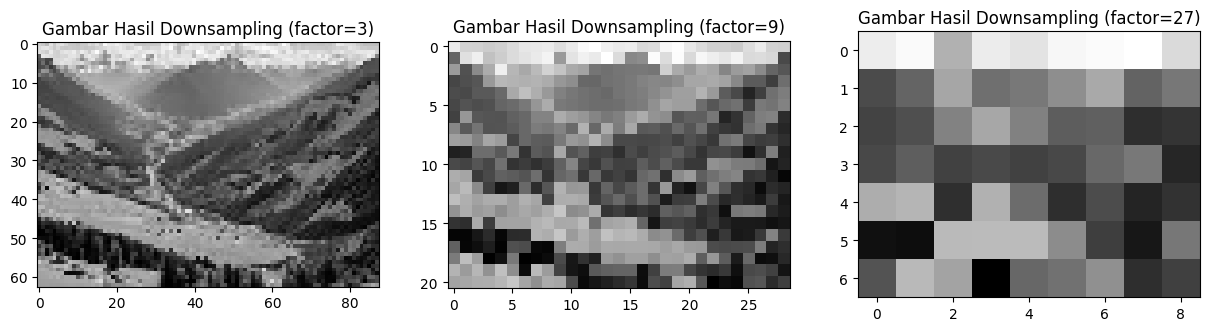

In [6]:
#sampling proses
factors = 3**np.arange(1, 4)

figure,axis = plt.subplots(1, len(factors), figsize=(15, 5))

for factor, ax in zip(factors,axis):
    new_size = (image.shape[1]//factor, image.shape[0]//factor)
    downsampled_image = cv2.resize(image, new_size)
    ax.imshow(downsampled_image, cmap='gray')
    ax.set_title(f"Gambar Hasil Downsampling (factor={factor})")
plt.show()

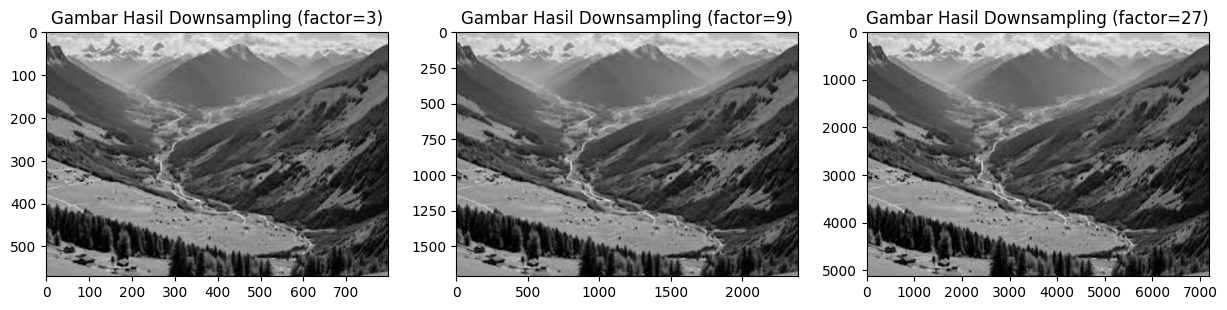

In [7]:
factors = 3**np.arange(1, 4)

figure,axis = plt.subplots(1, len(factors), figsize=(15, 5))

for factor, ax in zip(factors,axis):
    new_size = (image.shape[1] * factor, image.shape[0] * factor)
    upsampled_image = cv2.resize(image, new_size)
    ax.imshow(upsampled_image, cmap='gray')
    ax.set_title(f"Gambar Hasil Downsampling (factor={factor})")
plt.show()

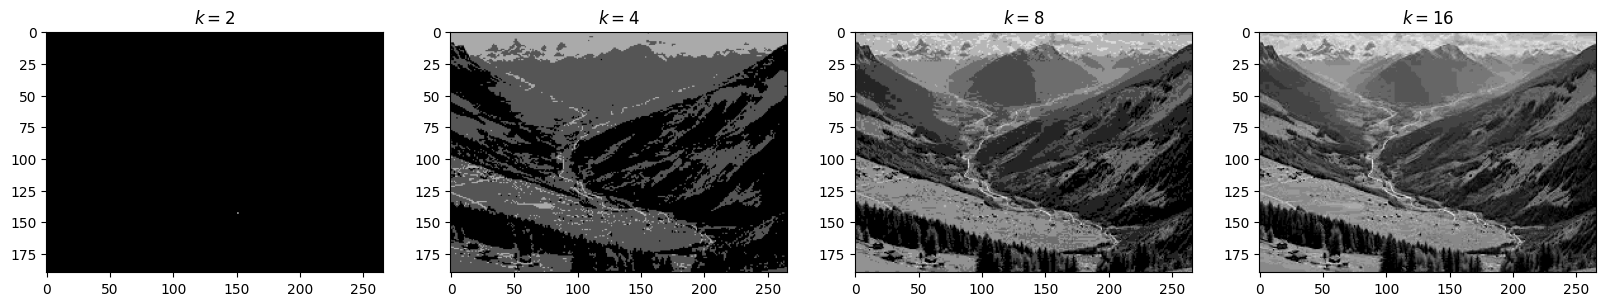

In [8]:
factors = 2**np.arange(1, 5)
figure,axis = plt.subplots(1, len(factors), figsize=(20, 6))
for idx, (k, ax) in enumerate(zip(factors,axis)):
  bins = np.linspace(0, image.max(), k)
  quantized_image = np.digitize(image, bins) -1
  reconstructed_image = np.take(bins, quantized_image)
  ax.imshow(reconstructed_image, cmap='gray')
  ax.set_title(f"$k = {k}$")
plt.show()